In [1]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("insurance.csv")

# Вывод первых строк данных
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [2]:
# Статистика данных
statistics = df.describe()
print(statistics)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


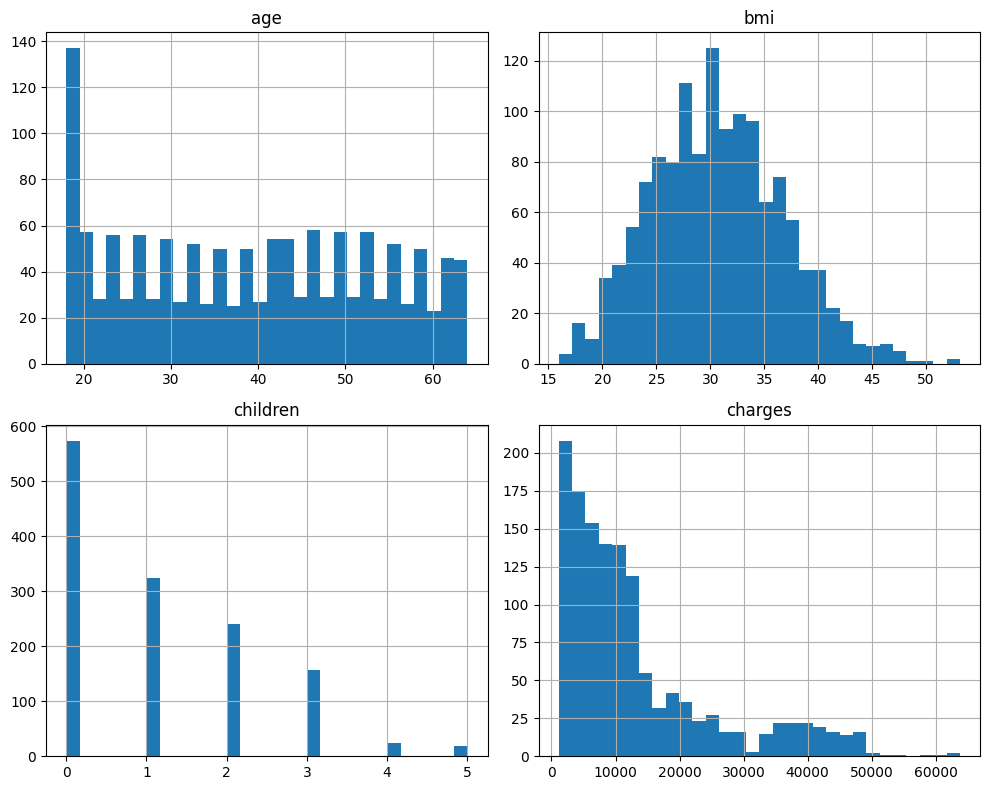

In [3]:
import matplotlib.pyplot as plt

# Построение гистограмм для всех числовых признаков
df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Выводы
# По гистограммам можно оценить распределение данных, например, расходы (charges) сильно смещены вправо.

BMI: Mean=30.66339686098655, Median=30.4, Std=6.098186911679014
Charges: Mean=13270.422265141257, Median=9382.033, Std=12110.011236694001


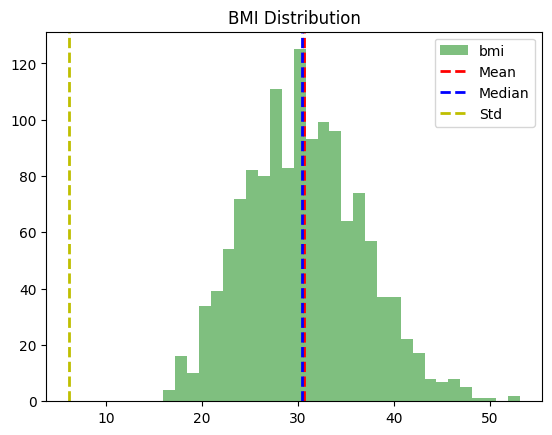

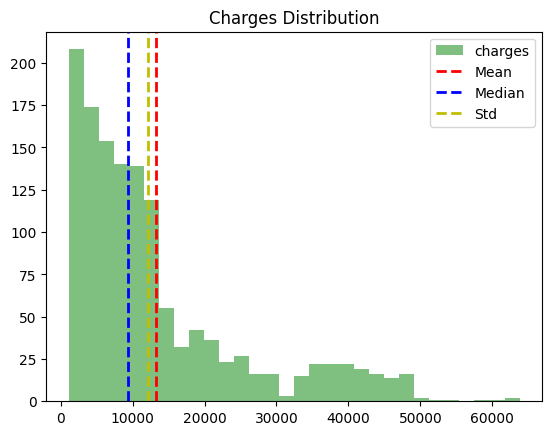

In [4]:
# Меры центральной тенденции
mean_bmi = df['bmi'].mean()
median_bmi = df['bmi'].median()
std_bmi = df['bmi'].std()

mean_charges = df['charges'].mean()
median_charges = df['charges'].median()
std_charges = df['charges'].std()

print(f"BMI: Mean={mean_bmi}, Median={median_bmi}, Std={std_bmi}")
print(f"Charges: Mean={mean_charges}, Median={median_charges}, Std={std_charges}")

# Построение гистограмм с вертикальными линиями для mean, median и std
plt.hist(df['bmi'], bins=30, alpha=0.5, color='g', label='bmi')
plt.axvline(mean_bmi, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_bmi, color='b', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(std_bmi, color='y', linestyle='dashed', linewidth=2, label='Std')
plt.legend()
plt.title('BMI Distribution')
plt.show()

plt.hist(df['charges'], bins=30, alpha=0.5, color='g', label='charges')
plt.axvline(mean_charges, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_charges, color='b', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(std_charges, color='y', linestyle='dashed', linewidth=2, label='Std')
plt.legend()
plt.title('Charges Distribution')
plt.show()

# Выводы: Мы видим, что распределение для обоих признаков несимметрично и различается по степени вариативности.

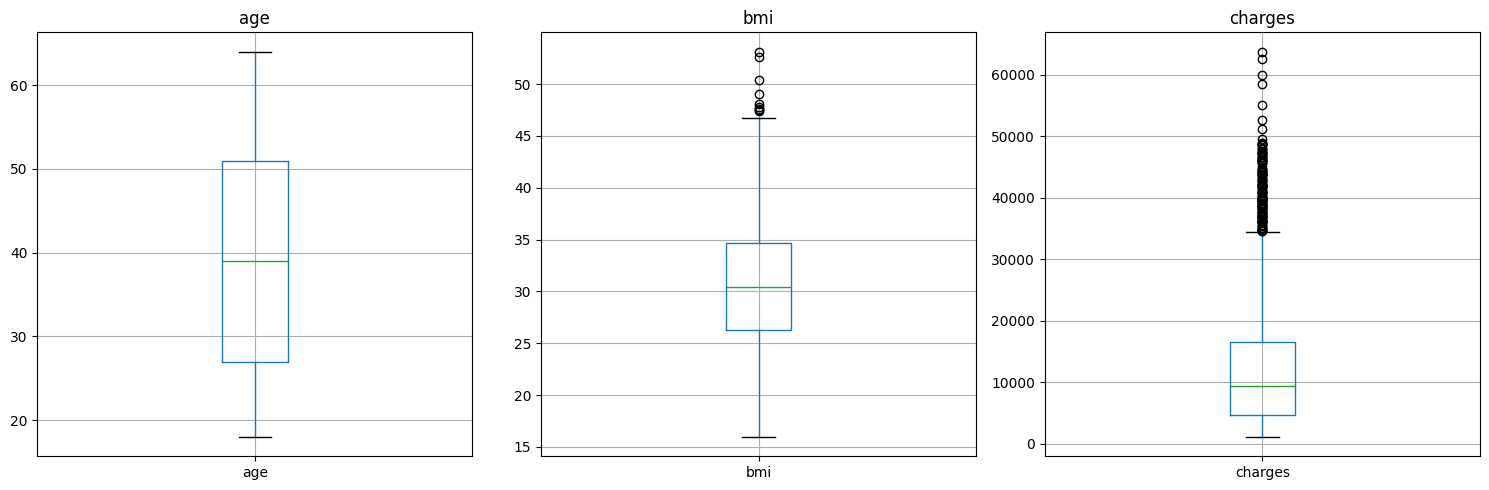

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv("insurance.csv")

# Определяем числовые признаки
numeric_features = ['age', 'bmi', 'charges']

# Создаем подграфики
fig, axs = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(15, 5))

# Создаем box-plot для каждого числового признака
for ax, feature in zip(axs, numeric_features):
    df.boxplot(column=feature, ax=ax)
    ax.set_title(feature)
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

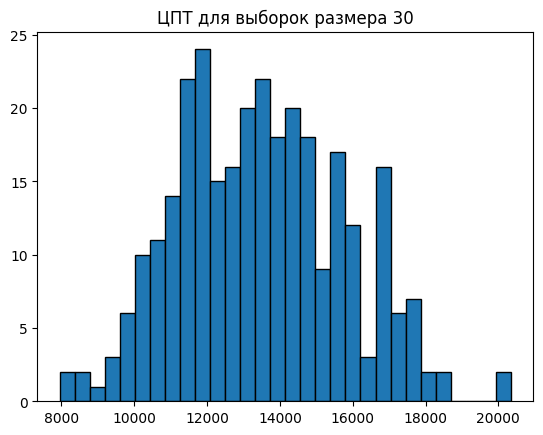

Среднее: 13487.932897156667, Стандартное отклонение: 2277.9898531220456


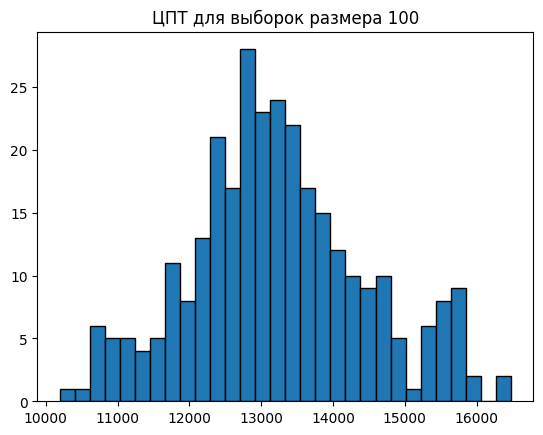

Среднее: 13231.775265030767, Стандартное отклонение: 1224.8191162746077


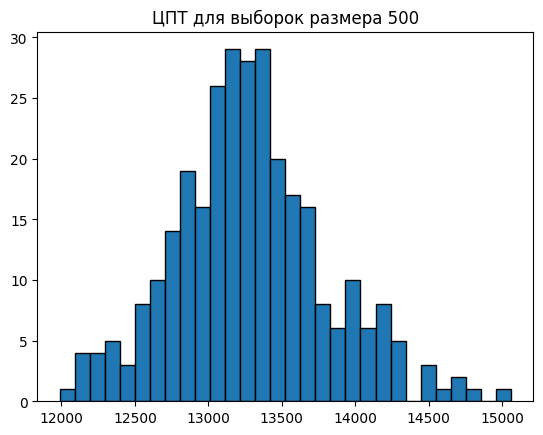

Среднее: 13290.291140072266, Стандартное отклонение: 522.1889391355566


In [6]:
import numpy as np

# Функция для создания выборок и проверки ЦПТ
def central_limit_theorem(data, n_samples, sample_size):
    sample_means = [np.mean(np.random.choice(data, size=sample_size)) for _ in range(n_samples)]
    plt.hist(sample_means, bins=30, edgecolor='black')
    plt.title(f'ЦПТ для выборок размера {sample_size}')
    plt.show()
    print(f"Среднее: {np.mean(sample_means)}, Стандартное отклонение: {np.std(sample_means)}")

# Проверим для charges с различными длинами выборок
central_limit_theorem(df['charges'], 300, 30)
central_limit_theorem(df['charges'], 300, 100)
central_limit_theorem(df['charges'], 300, 500)

# Выводы: С увеличением размера выборки, распределение средних выборок становится более нормальным.

In [7]:
import scipy.stats as stats

# Доверительный интервал для charges
confidence_level = 0.95
mean_charges = np.mean(df['charges'])
std_error_charges = stats.sem(df['charges'])
interval_charges = stats.t.interval(confidence_level, len(df['charges']) - 1, loc=mean_charges, scale=std_error_charges)

print(f"95% доверительный интервал для charges: {interval_charges}")

# Для 99% CI аналогично
confidence_level = 0.99
interval_charges_99 = stats.t.interval(confidence_level, len(df['charges']) - 1, loc=mean_charges, scale=std_error_charges)

print(f"99% доверительный интервал для charges: {interval_charges_99}")

# Аналогично для bmi
confidence_level = 0.95
mean_bmi = np.mean(df['bmi'])
std_error_bmi = stats.sem(df['bmi'])
interval_bmi = stats.t.interval(confidence_level, len(df['bmi']) - 1, loc=mean_bmi, scale=std_error_bmi)

print(f"95% доверительный интервал для bmi: {interval_bmi}")

95% доверительный интервал для charges: (12620.954034192644, 13919.890496089869)
99% доверительный интервал для charges: (12416.429943203952, 14124.414587078561)
95% доверительный интервал для bmi: (30.336346903054107, 30.99044681891899)


KS-тест для bmi: стат=0.026099881197044872, p-value=0.3162798242838005


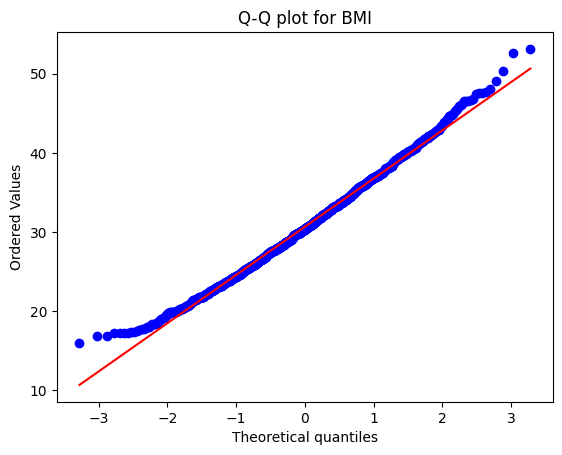

KS-тест для charges: стат=0.18846450965981876, p-value=4.381949677777398e-42


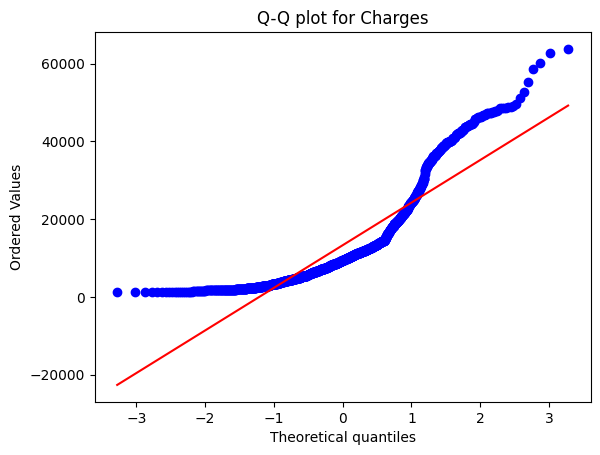

In [8]:
import scipy.stats as stats
import seaborn as sns

# KS-тест для bmi
ks_stat_bmi, p_value_bmi = stats.kstest(df['bmi'], 'norm', args=(df['bmi'].mean(), df['bmi'].std()))
print(f"KS-тест для bmi: стат={ks_stat_bmi}, p-value={p_value_bmi}")

# Q-Q plot для bmi
stats.probplot(df['bmi'], dist="norm", plot=plt)
plt.title('Q-Q plot for BMI')
plt.show()

# KS-тест для charges
ks_stat_charges, p_value_charges = stats.kstest(df['charges'], 'norm', args=(df['charges'].mean(), df['charges'].std()))
print(f"KS-тест для charges: стат={ks_stat_charges}, p-value={p_value_charges}")

# Q-Q plot для charges
stats.probplot(df['charges'], dist="norm", plot=plt)
plt.title('Q-Q plot for Charges')
plt.show()

# Выводы: Нулевая гипотеза — данные нормально распределены, если p-value > 0.05. 
# Если p-value < 0.05, мы отвергаем нулевую гипотезу в пользу альтернативной.

In [10]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("ECDCCases.csv")

# Просмотр первых строк данных
print(df.head())

      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  14/12/2020   14     12  2020    746       6             Afghanistan    AF   
1  13/12/2020   13     12  2020    298       9             Afghanistan    AF   
2  12/12/2020   12     12  2020    113      11             Afghanistan    AF   
3  12/12/2020   12     12  2020    113      11             Afghanistan    AF   
4  11/12/2020   11     12  2020     63      10             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           9.013779           
1                                           7.052776           
2             

In [11]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Вывести процент пропущенных значений
print(missing_percentage)

# Найти два признака с наибольшим количеством пропущенных значений
most_missing = missing_percentage.nlargest(2)
print(f"Два признака с наибольшим количеством пропусков:\n{most_missing}")

# Удалить два признака с наибольшим количеством пропущенных значений
df = df.drop(columns=most_missing.index)

# Обработка пропусков в категориальных признаках значением "other"
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('other')

# Обработка пропусков в числовых признаках медианой
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Проверить, что больше нет пропущенных значений
print("Пропуски после обработки:")
print(df.isnull().sum())

dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64
Два признака с наибольшим количеством пропусков:
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
geoId        

In [15]:
# Статистика по данным
stats = df.describe()
print(stats)

# Работаем только с числовыми признаками для поиска выбросов
numeric_columns = df.select_dtypes(include=['number'])

# Вычисление первого и третьего квартиля для числовых признаков
Q1 = numeric_columns.quantile(0.25, numeric_only=True)
Q3 = numeric_columns.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Поиск выбросов для каждого числового признака
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any()

print(f"Признаки с выбросами:\n{outliers[outliers]}")

# Найти, в каких странах количество смертей в день превышало 3000 и сколько таких дней было
if 'deaths' in df.columns:
    high_deaths = df[df['deaths'] > 3000]
    print(f"Страны с более 3000 смертей в день:\n{high_deaths['countriesAndTerritories'].value_counts()}")
    print(f"Количество таких дней: {len(high_deaths)}")
else:
    print("Признак 'deaths' отсутствует в данных")


                day         month          year          cases        deaths  \
count  61900.000000  61900.000000  61900.000000   61900.000000  61900.000000   
mean      15.628934      7.067157   2019.998918    1155.147237     26.055460   
std        8.841582      2.954776      0.032882    6779.224479    131.227055   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190000e+04  
mean   4.092050e+07  
std    1.529846e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  
Признаки с выбросами:
year           True
cases          True
deaths         True

In [14]:
# Поиск дубликатов
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

# Удаление дубликатов
df = df.drop_duplicates()

# Проверить, что дубликатов больше нет
print(f"Количество дубликатов после удаления: {df.duplicated().sum()}")


Количество дубликатов: 4
Количество дубликатов после удаления: 0


In [19]:
import pandas as pd

# Загрузка данных
df = pd.read_csv("bmi.csv")
# Просмотр первых строк данных
print(df.head())


      bmi     region
0  22.705  northwest
1  28.880  northwest
2  27.740  northwest
3  25.840  northwest
4  28.025  northwest


In [18]:
# Выборка индекса массы тела для региона northwest и southwest
northwest_bmi = df[df['region'] == 'northwest']['bmi']
southwest_bmi = df[df['region'] == 'southwest']['bmi']

# Проверим первые несколько значений для каждой выборки
print("Northwest BMI:")
print(northwest_bmi.head())
print("Southwest BMI:")
print(southwest_bmi.head())

Northwest BMI:
0    22.705
1    28.880
2    27.740
3    25.840
4    28.025
Name: bmi, dtype: float64
Southwest BMI:
325    27.9
326    34.4
327    24.6
328    40.3
329    35.3
Name: bmi, dtype: float64


In [20]:
from scipy import stats

# Критерий Шапиро-Уилка для проверки нормальности
shapiro_nw = stats.shapiro(northwest_bmi)
shapiro_sw = stats.shapiro(southwest_bmi)
print(f"Shapiro-Wilk test для northwest: p-value = {shapiro_nw.pvalue}")
print(f"Shapiro-Wilk test для southwest: p-value = {shapiro_sw.pvalue}")
# Критерий Бартлетта для проверки равенства дисперсий
bartlett_test = stats.bartlett(northwest_bmi, southwest_bmi)
print(f"Bartlett test: p-value = {bartlett_test.pvalue}")
# t-критерий Стьюдента для сравнения средних
t_test = stats.ttest_ind(northwest_bmi, southwest_bmi, equal_var=True)
print(f"T-test: p-value = {t_test.pvalue}")

Shapiro-Wilk test для northwest: p-value = 0.4655335247516632
Shapiro-Wilk test для southwest: p-value = 0.3629520535469055
Bartlett test: p-value = 0.06519347353581818
T-test: p-value = 0.001076958496307695


In [21]:
import numpy as np
from scipy import stats

# Данные по количеству выпадений для каждого числа
observed = [97, 98, 109, 95, 97, 104]

# Ожидаемое количество выпадений для каждого числа при равномерном распределении
expected = [100] * 6  # 600 бросков кубика, вероятность для каждого числа 1/6, значит 600 / 6 = 100

# Проведение теста Хи-квадрат
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Вывод результата
print(f"Chi-square stat: {chi2_stat}")
print(f"p-value: {p_value}")

# Интерпретация
if p_value < 0.05:
    print("Нулевая гипотеза отвергается. Распределение не является равномерным.")
else:
    print("Нулевая гипотеза не отвергается. Распределение можно считать равномерным.")

Chi-square stat: 1.44
p-value: 0.9198882077437889
Нулевая гипотеза не отвергается. Распределение можно считать равномерным.


In [22]:
import pandas as pd
from scipy import stats

# Создание DataFrame
data = pd.DataFrame({
    'Женат': [89, 17, 11, 43, 22, 1],
    'Гражданский брак': [80, 22, 20, 35, 6, 4],
    'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]
})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает', 'На домохозяйстве', 'На пенсии', 'Учёба']

# Проведение теста Хи-квадрат
chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)

# Вывод результатов
print(f"Chi-square stat: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# Интерпретация результата
if p_value < 0.05:
    print("Нулевая гипотеза отвергается. Семейное положение влияет на занятость.")
else:
    print("Нулевая гипотеза не отвергается. Семейное положение не влияет на занятость.")


Chi-square stat: 122.29654948595365
p-value: 1.7291616900960234e-21
Degrees of freedom: 10
Expected frequencies:
[[74.664 68.136 61.2  ]
 [30.378 27.722 24.9  ]
 [24.156 22.044 19.8  ]
 [30.744 28.056 25.2  ]
 [13.176 12.024 10.8  ]
 [ 9.882  9.018  8.1  ]]
Нулевая гипотеза отвергается. Семейное положение влияет на занятость.
